In [325]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [326]:
import numpy as np
import pandas as pd

In [327]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [328]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [329]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [330]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(engine, reflect=True)

# reflect the tables
from sqlalchemy import Column, Integer, String, Float, Date

class Station(Base):
    __tablename__ = 'Station'
    station = Column(String, primary_key=True)
    name = Column(String(255))
    latitude = Column(String(255))
    longtitude = Column(String(255))
    elevation = Column(Integer)

class Measurement(Base):
    __tablename__ = 'Measurement'
    station = Column(String, primary_key=True)
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Integer)


In [331]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [332]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [333]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

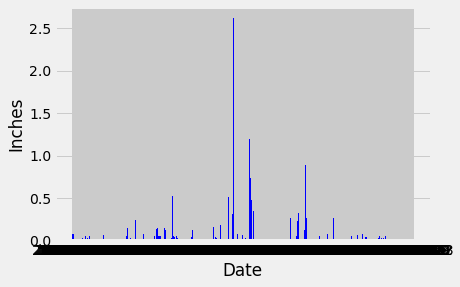

In [334]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
import datetime as dt
from datetime import date, timedelta

# Calculate the date 1 year ago from the last data point in the database
LastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#convert to Datetime
YearDate = pd.to_datetime(LastDate.date)

#find the Date 
LastDateFormat = dt.date(YearDate.year, YearDate.month, YearDate.day) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
Results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > LastDateFormat).group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date columns
Results_df = pd.DataFrame(Results, columns=['Date','Inches'])
Results_df.set_index('Date', inplace=True)

# Sort the dataframe by date
Results_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data

LastDate_DateForm = dt.date(YearDate.year, YearDate.month, YearDate.day)

DateRange = pd.date_range(LastDateFormat, LastDate_DateForm)

Days = timedelta(days=30)

arr = np.arange(LastDateFormat, LastDate_DateForm, Days).astype(date)
inches = []


y= Results_df.Inches

plt.xlabel('Date')
plt.ylabel('Inches')
plt.bar(x,y,color='b')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [335]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Results_df.describe()

,Inches
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [350]:
# Design a query to show how many stations are available in this dataset?
Stations = session.query(func.count(Measurement.station)).filter(Measurement.date > LastDateFormat).all()
Stations

[(2223)]

In [337]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [338]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [339]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [340]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [341]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [342]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [343]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [344]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [345]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [346]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [347]:
# Plot the daily normals as an area plot with `stacked=False`
